Net(
  (hidden1): Linear(in_features=2, out_features=20, bias=True)
  (hidden2): Linear(in_features=20, out_features=20, bias=True)
  (predict): Linear(in_features=20, out_features=2, bias=True)
)


C:\Users\0223\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
C:\Users\0223\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:61: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


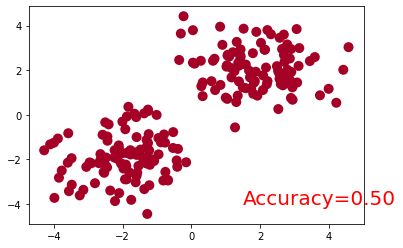

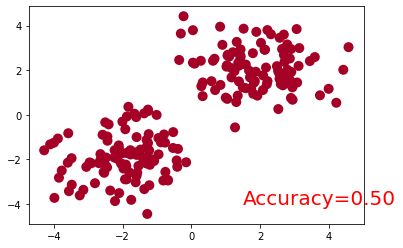

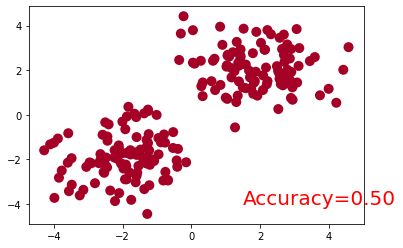

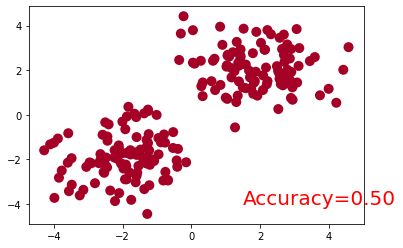

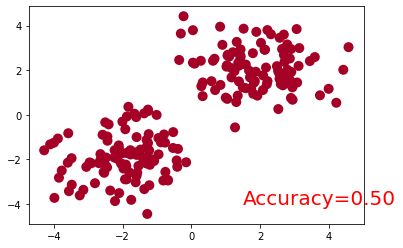

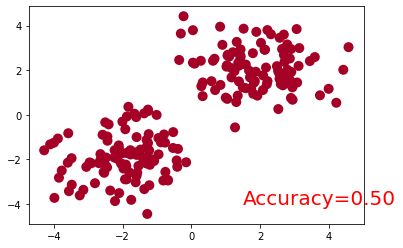

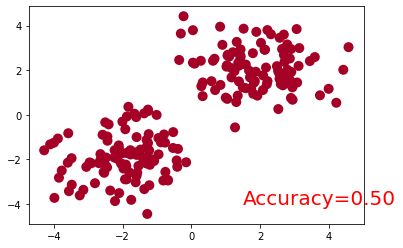

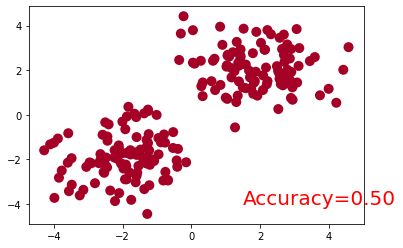

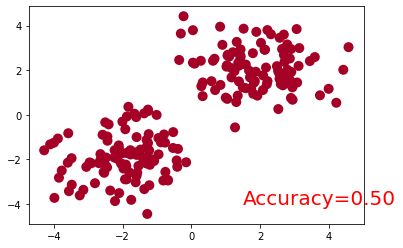

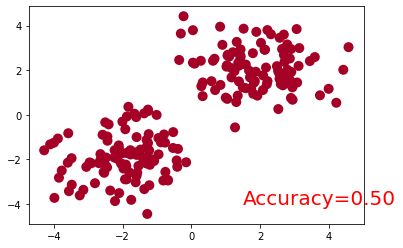

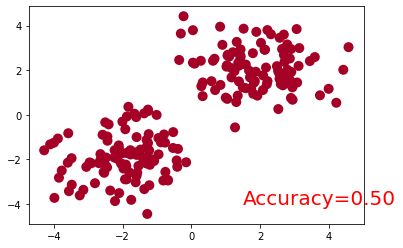

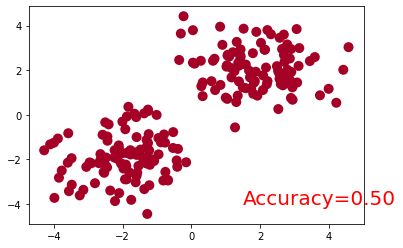

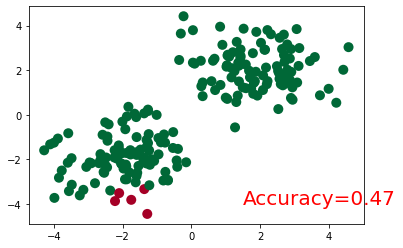

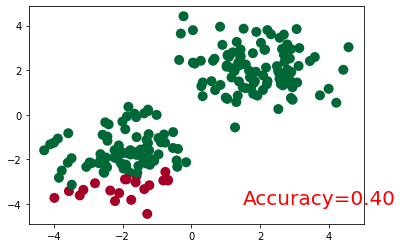

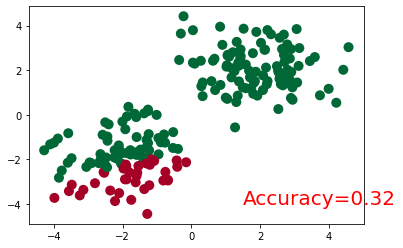

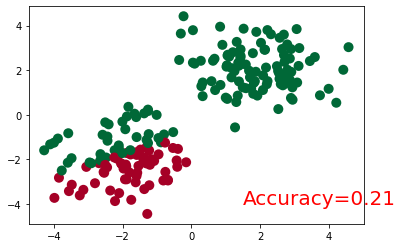

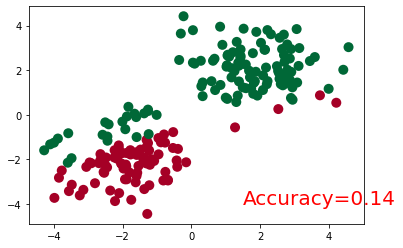

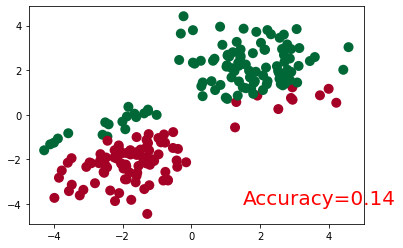

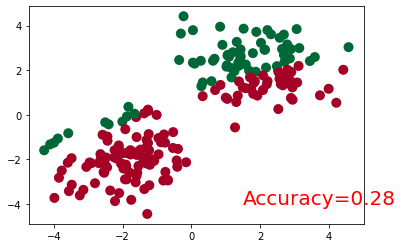

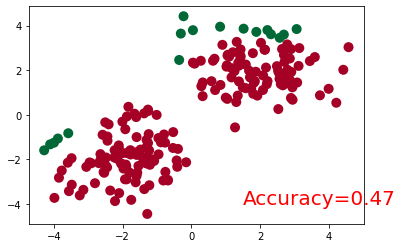

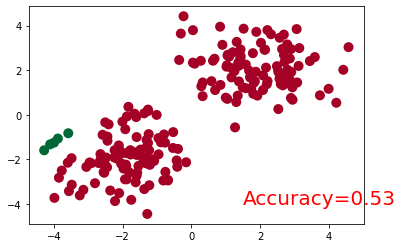

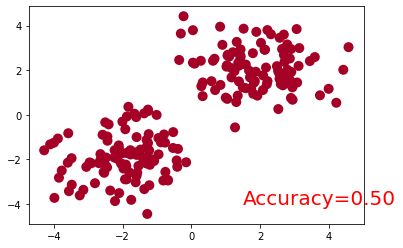

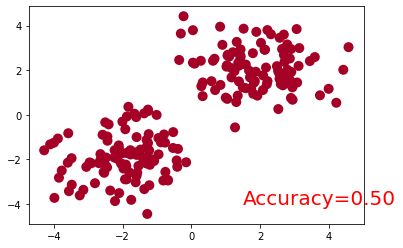

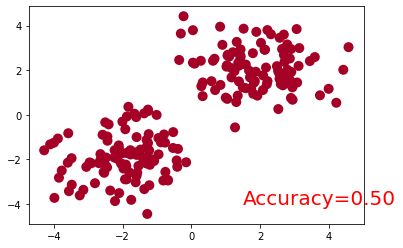

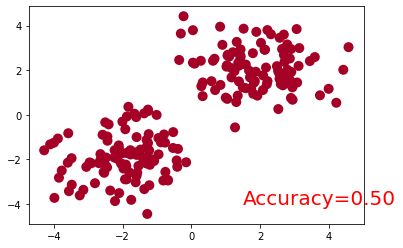

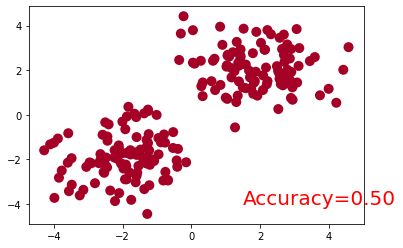

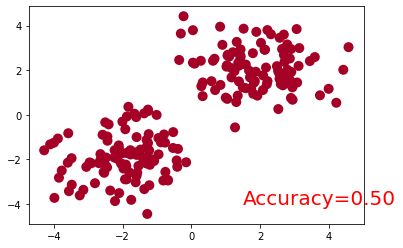

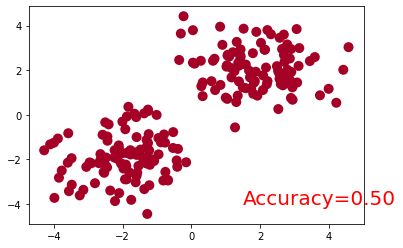

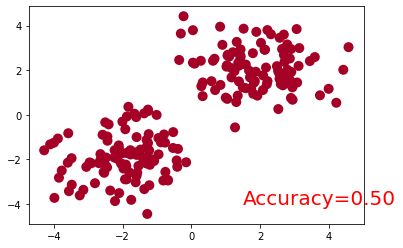

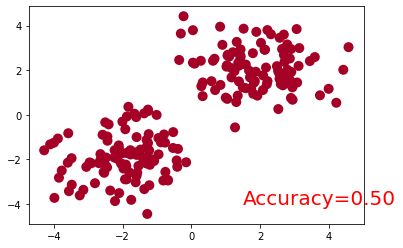

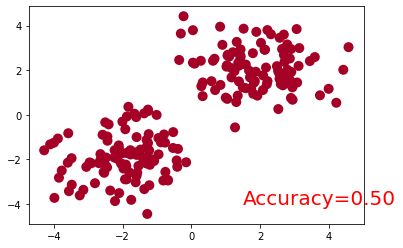

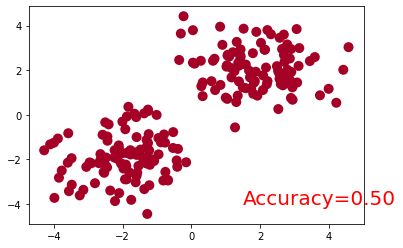

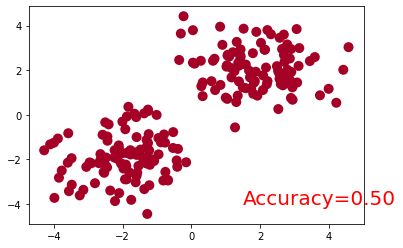

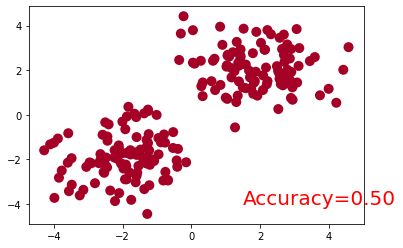

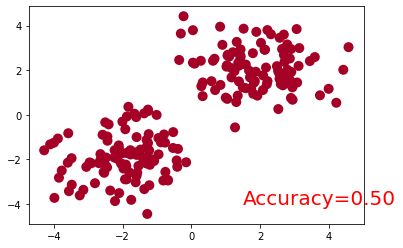

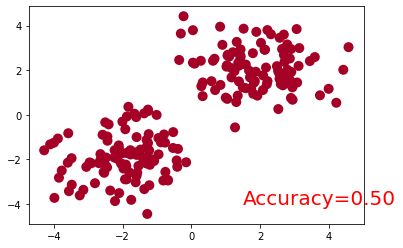

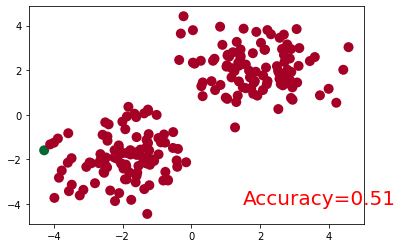

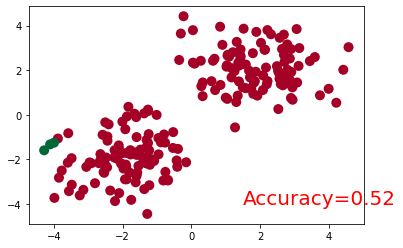

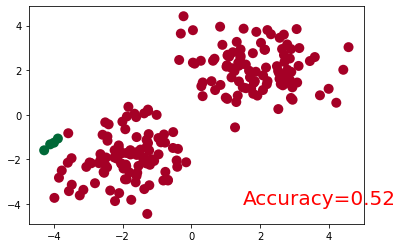

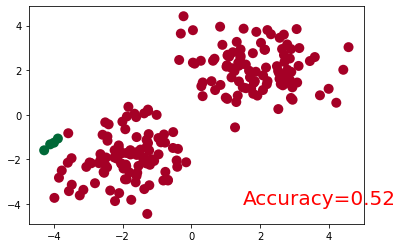

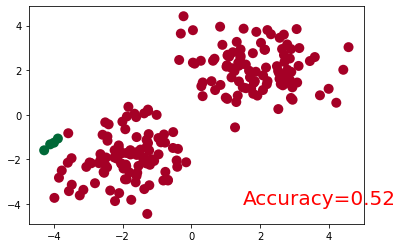

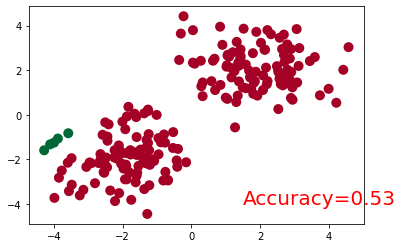

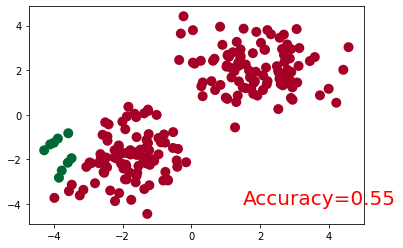

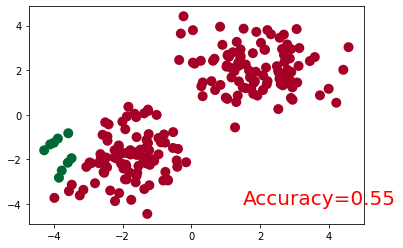

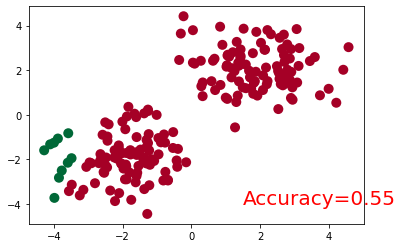

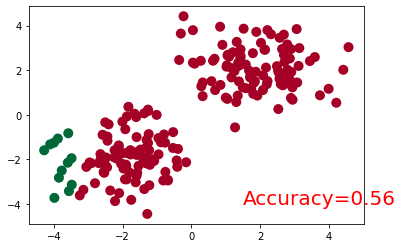

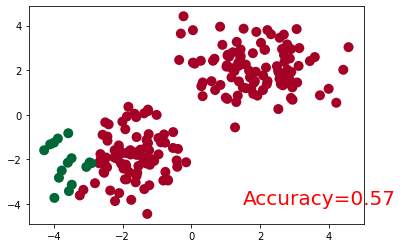

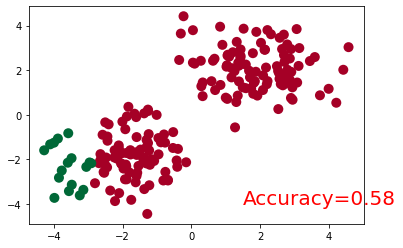

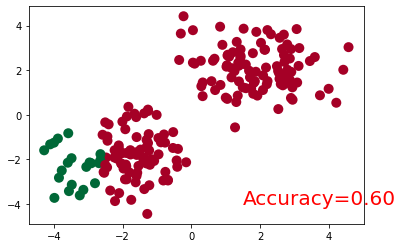

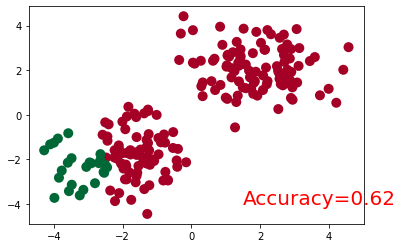

In [12]:
import torch
import numpy as np
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

n_data = torch.ones(100,2)
x0 = torch.normal(2*n_data,1)
y0 = torch.zeros(100)
# print(x0)
x1 = torch.normal(-2*n_data,1)
y1 = torch.ones(100)


x = torch.cat((x0,x1),0).type(torch.FloatTensor)
y = torch.cat((y0,y1)).type(torch.LongTensor)
# print(y)
x,y = Variable(x),Variable(y)


class Net(torch.nn.Module):
    def __init__(self,n_input,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden1 = torch.nn.Linear(n_input,n_hidden)
        self.hidden2 = torch.nn.Linear(n_hidden,n_hidden)
        self.predict = torch.nn.Linear(n_hidden,n_output)

    def forward(self, input):
        out = self.hidden1(input)
        out = F.sigmoid(out)
        out = self.hidden2(out)
        out = F.sigmoid(out)
        out = self.predict(out)
        # out = F.softmax(out)
        return out
    
net = Net(2, 20, 2)
print(net)


optimizer = torch.optim.SGD(net.parameters(),lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()

plt.ion()
plt.show()


for t in range(100):
    out = net(x)
    # print(prediction)
    loss = loss_func(out,y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if t%2==0:
        plt.cla()
        # 过了一道 softmax 的激励函数后的最大概率才是预测值
        # print(F.softmax(prediction))
        prediction = torch.max(F.softmax(out),1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y) / 200.  # 预测中有多少和真实值一样
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1)

plt.ioff()  # 停止画图
plt.show()



In [38]:
import numpy as np
import torch

def sigmoid(x):
    return 1 / (1 + np.exp(x))


class Neuron():
    
    """
    创建一个神经网络
    feedforward: 相前反馈传播
    """
    
    def __init__(self, weights, bias):
        self.weights = weights;
        self.bias = bias
        
    def forward(self, inputs):
        print("111")
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)
    
# weights = np.array([0, 1])
# bias = 4
# neuron = Neuron(weights, bias)
# x = np.array([2, 3])
# ans = neuron.forward(x)
# print(ans)
    
    
class OurNeuron():
    
    """
    A nerual network with:
        -2 inputs
        -1 hidden layer with 2 neurons (h1, h2)
        -1 output layer with 1 neuron(o1)
    Each nerual with the same weights and bias
    feedforward调用的是Neuron里面的forward函数
    """
    def __init__(self):
        
        weights = np.array([0, 1])
        bias = 0
        
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
        
    def feedforward(self, x):
        
        out_h1 = self.h1.forward(x)
        out_h2 = self.h2.forward(x)
        out_o1 = self.o1.forward(np.array([out_h1, out_h2]))
        return out_o1
                                 
                                 
        
outneuron = OurNeuron()
x = np.array([2, 3])
ans = outneuron.feedforward(x)
print(ans)


111
111
111
0.48814575351653683


Epoch 0 loss : 0.359
Epoch 0 loss : 0.356
Epoch 0 loss : 0.353
Epoch 0 loss : 0.353
Epoch 10 loss : 0.294
Epoch 10 loss : 0.290
Epoch 10 loss : 0.286
Epoch 10 loss : 0.286
Epoch 20 loss : 0.209
Epoch 20 loss : 0.205
Epoch 20 loss : 0.200
Epoch 20 loss : 0.200
Epoch 30 loss : 0.133
Epoch 30 loss : 0.130
Epoch 30 loss : 0.127
Epoch 30 loss : 0.127
Epoch 40 loss : 0.084
Epoch 40 loss : 0.083
Epoch 40 loss : 0.081
Epoch 40 loss : 0.081
Epoch 50 loss : 0.058
Epoch 50 loss : 0.057
Epoch 50 loss : 0.056
Epoch 50 loss : 0.056
Epoch 60 loss : 0.043
Epoch 60 loss : 0.042
Epoch 60 loss : 0.042
Epoch 60 loss : 0.042
Epoch 70 loss : 0.033
Epoch 70 loss : 0.033
Epoch 70 loss : 0.033
Epoch 70 loss : 0.033
Epoch 80 loss : 0.027
Epoch 80 loss : 0.027
Epoch 80 loss : 0.027
Epoch 80 loss : 0.027
Epoch 90 loss : 0.023
Epoch 90 loss : 0.023
Epoch 90 loss : 0.023
Epoch 90 loss : 0.023
Epoch 100 loss : 0.020
Epoch 100 loss : 0.020
Epoch 100 loss : 0.020
Epoch 100 loss : 0.020
Epoch 110 loss : 0.017
Epoch 110

No handles with labels found to put in legend.


Epoch 570 loss : 0.003
Epoch 570 loss : 0.003
Epoch 570 loss : 0.003
Epoch 570 loss : 0.003
Epoch 580 loss : 0.003
Epoch 580 loss : 0.003
Epoch 580 loss : 0.003
Epoch 580 loss : 0.003
Epoch 590 loss : 0.003
Epoch 590 loss : 0.003
Epoch 590 loss : 0.003
Epoch 590 loss : 0.003
Epoch 600 loss : 0.003
Epoch 600 loss : 0.003
Epoch 600 loss : 0.003
Epoch 600 loss : 0.003
Epoch 610 loss : 0.002
Epoch 610 loss : 0.002
Epoch 610 loss : 0.002
Epoch 610 loss : 0.002
Epoch 620 loss : 0.002
Epoch 620 loss : 0.002
Epoch 620 loss : 0.002
Epoch 620 loss : 0.002
Epoch 630 loss : 0.002
Epoch 630 loss : 0.002
Epoch 630 loss : 0.002
Epoch 630 loss : 0.002
Epoch 640 loss : 0.002
Epoch 640 loss : 0.002
Epoch 640 loss : 0.002
Epoch 640 loss : 0.002
Epoch 650 loss : 0.002
Epoch 650 loss : 0.002
Epoch 650 loss : 0.002
Epoch 650 loss : 0.002
Epoch 660 loss : 0.002
Epoch 660 loss : 0.002
Epoch 660 loss : 0.002
Epoch 660 loss : 0.002
Epoch 670 loss : 0.002
Epoch 670 loss : 0.002
Epoch 670 loss : 0.002
Epoch 670 l

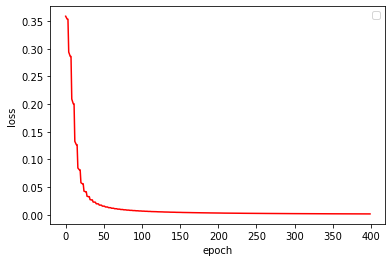

In [77]:
import numpy as np
import torch
import matplotlib.pyplot as plt

def sigmoid(x):
    
    return 1 / (1 + np.exp(-x))

def derive_sigmoid(x):
    
    fx = sigmoid(x)
    return fx * (1 - fx)

def mes_loss(y_true, y_pred):
    """
    均方误差
    """
    return ((y_true - y_pred) ** 2).mean()

class MyNetwork:
    """
    A nerual network with:
        -2 inputs
        -1 output layer with 1 neuron(o_1)
        -1 hidden layer wiht 2 neuron(h1, h2)
    """
    def __init__(self):
        
        self.w1 = np.random.normal();
        self.w2 = np.random.normal();
        self.w3 = np.random.normal();
        self.w4 = np.random.normal();
        self.w5 = np.random.normal();
        self.w6 = np.random.normal();
        
        self.b1 = np.random.normal();
        self.b2 = np.random.normal();
        self.b3 = np.random.normal();
        
    def feedforward(self, x):
        
        h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
        h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
        o1 = sigmoid(self.w5 * h1   + self.w6 * h2  + self.b3)
        
        return o1
    
    def train(self, data, all_y_trues):
        
        learn_rate = 0.1
        epochs = 1000
        
        
        for epoch in range(epochs):
            for x, y_true in zip(data, all_y_trues):
                sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
                h1 = sigmoid(sum_h1)
                
                sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
                h2 = sigmoid(sum_h2)
                
                sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
                o_1 = sigmoid(sum_o1)
                y_pred = o_1
                
                
                d_L_d_ypred = -2 * (y_true - y_pred)
                
                
                # neuron o1
                d_ypred_d_w5 = h1 * derive_sigmoid(sum_o1)
                d_ypred_d_w6 = h2 * derive_sigmoid(sum_o1)
                d_ypred_d_b3 = derive_sigmoid(sum_o1)
                
                d_ypred_d_h1 = self.w5 * derive_sigmoid(sum_o1)
                d_ypred_d_h2 = self.w6 * derive_sigmoid(sum_o1)
                
                # neuron h1
                d_h1_d_w1 = x[0] * derive_sigmoid(sum_h1)
                d_h1_d_w2 = x[1] * derive_sigmoid(sum_h1)
                d_h1_d_b1 = derive_sigmoid(sum_h1)
                
                # neuron h2
                d_h2_d_w3 = x[0] * derive_sigmoid(sum_h2)
                d_h2_d_w4 = x[1] * derive_sigmoid(sum_h2)
                d_h2_d_b2 = derive_sigmoid(sum_h2)
                
                
                # update the w and b
                # neuron h1
                self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
                self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
                self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1
                
                
                # neuron h2
                self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
                self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
                self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2
                
                # neuron o1
                self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
                self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
                self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_b3
                
                
                # calculate total loss  at the end of each epoch
                if epoch % 10 == 0:
                    y_preds = np.apply_along_axis(self.feedforward, 1, data) # 将data数据经过feedforward矩阵转化为一行数据
                    loss = mes_loss(all_y_trues, y_preds)
                    epoch_loss.append(loss) # 将损失添加到列表
                    print("Epoch %d loss : %.3f" % (epoch, loss))
                
                
                
data = np.array([
    [-2, -1], 
    [25, 6], 
    [17, 4],
    [-15, -6]
])
all_y_trues = np.array([
    1, 
    0, 
    0,
    1
])

epoch_loss = []
myNetwork = MyNetwork()
myNetwork.train(data, all_y_trues)  

print(epoch_loss)
xList = [x for x in range(0, 400, 1)]
plt.figure()
plt.switch_backend('Agg') 
plt.plot(xList, epoch_loss, color = 'red' )
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend() # 颜色设计 形状


        


In [63]:

print(xList)

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
